In [1]:
# Import modules
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
import keras.utils as image
from sklearn.model_selection import train_test_split
from keras.layers import GlobalAveragePooling2D

# Import modules
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

import numpy as np
import librosa.display, os
# import keras.utils as image
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow_hub as hub
import datetime
import matplotlib.pyplot as plt


from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm


from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

c:\Users\lorra\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [2]:
# Load data parameters
tf.random.set_seed(42)

batch_size = 32
img_height = img_width = 224
channels = 3
epochs = 20
input_shape = (224, 224, 3)

root = '../data/spectrograms/testing' #r'path_to_Spectrogram_folder' 

In [3]:
def load_images_from_path(path, label):
    images = []
    labels = []
    
    i = 0
    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
        # Logging images read
        i += 1
        if(i%500 == 0):
            print('Loaded',i,'images')
            
    print('\nTotal images = ',i)
    return images, labels



x = []
y = []

# Load real data
images, labels = load_images_from_path(os.path.join(root, 'real'), 0)
    
x += images
y += labels

print('Image shape:',x[0].shape)
print('Image label (REAL):',y[0])


# Load fake data
images, labels = load_images_from_path(os.path.join(root, 'fake'), 1)
    
x += images
y += labels

print('Image shape:',x[0].shape)
print('Image label (FAKE):',y[-1])



# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25, random_state = 42)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

# Don't use to_categorical for binary classification with single output
y_train_encoded = np.array(y_train)
y_test_encoded = np.array(y_test)


print('Train image shape',x_train[0].shape, '\n', len(x_train_norm))
print('Train labels',y_train_encoded[0], '\n', y_train_encoded.shape)
print('Test image shape',x_test_norm[0].shape, '\n', len(x_test_norm))
print('Test labels',y_test_encoded[0:10], '\n', y_test_encoded.shape)

Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images

Total images =  2264
Image shape: (224, 224, 3)
Image label (REAL): 0
Loaded 500 images
Loaded 1000 images
Loaded 1500 images
Loaded 2000 images

Total images =  2370
Image shape: (224, 224, 3)
Image label (FAKE): 1
Train image shape (224, 224, 3) 
 3475
Train labels 1 
 (3475,)
Test image shape (224, 224, 3) 
 1159
Test labels [1 0 0 1 0 0 1 1 1 1] 
 (1159,)


C:\Users\lorra\AppData\Local\Temp\ipykernel_35296\1599181043.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  'MobileNet': MobileNet(weights='imagenet', include_top=False),



Training model: MobileNet
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 443ms/step - accuracy: 0.9496 - loss: 0.2102 - val_accuracy: 0.9965 - val_loss: 0.0658
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 471ms/step - accuracy: 0.9983 - loss: 0.0420 - val_accuracy: 0.9965 - val_loss: 0.0331
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 354ms/step - accuracy: 0.9988 - loss: 0.0232 - val_accuracy: 0.9983 - val_loss: 0.0216
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 355ms/step - accuracy: 0.9991 - loss: 0.0156 - val_accuracy: 0.9991 - val_loss: 0.0158
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 42s 389ms/step - accuracy: 0.9991 - loss: 0.0115 - val_accuracy: 0.9991 - val_loss: 0.0123


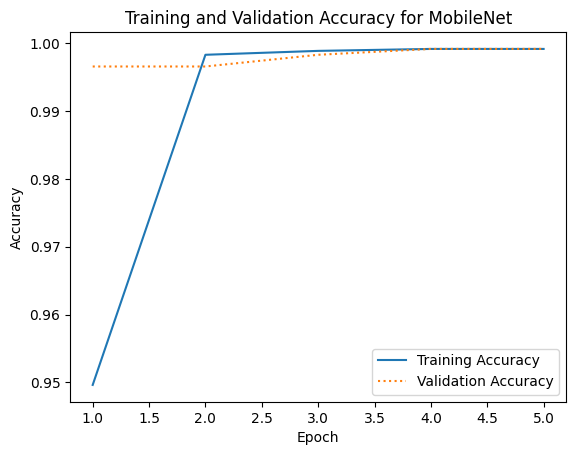


Training model: InceptionV3
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9318 - loss: 0.2210 - val_accuracy: 0.9871 - val_loss: 0.0893
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 784ms/step - accuracy: 0.9885 - loss: 0.0693 - val_accuracy: 0.9948 - val_loss: 0.0502
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9948 - loss: 0.0424 - val_accuracy: 0.9957 - val_loss: 0.0360
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 103s 948ms/step - accuracy: 0.9957 - loss: 0.0301 - val_accuracy: 0.9957 - val_loss: 0.0281
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 91s 842ms/step - accuracy: 0.9977 - loss: 0.0231 - val_accuracy: 0.9957 - val_loss: 0.0229


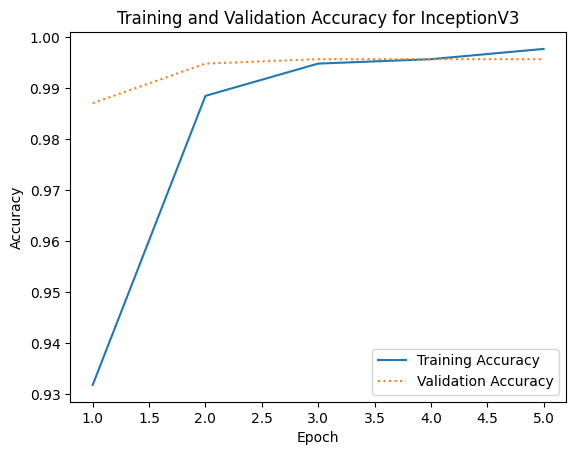


Training model: ResNet50
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5355 - loss: 0.6932 - val_accuracy: 0.7757 - val_loss: 0.6733
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6161 - loss: 0.6715 - val_accuracy: 0.8119 - val_loss: 0.6547
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6904 - loss: 0.6532 - val_accuracy: 0.8637 - val_loss: 0.6368
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.7364 - loss: 0.6357 - val_accuracy: 0.8852 - val_loss: 0.6198
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 102s 938ms/step - accuracy: 0.7755 - loss: 0.6190 - val_accuracy: 0.8999 - val_loss: 0.6035


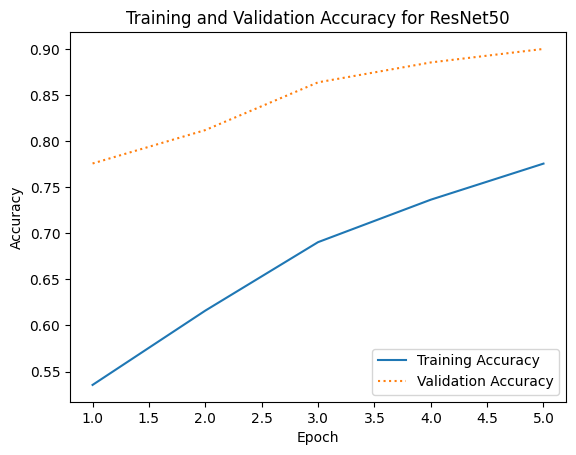


Training model: VGG16
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 611s 6s/step - accuracy: 0.7471 - loss: 0.6480 - val_accuracy: 0.9776 - val_loss: 0.5697
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 567s 5s/step - accuracy: 0.9753 - loss: 0.5159 - val_accuracy: 0.9896 - val_loss: 0.4617
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 498s 5s/step - accuracy: 0.9882 - loss: 0.4221 - val_accuracy: 0.9922 - val_loss: 0.3813
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 500s 5s/step - accuracy: 0.9914 - loss: 0.3519 - val_accuracy: 0.9957 - val_loss: 0.3209
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 0.9945 - loss: 0.2984 - val_accuracy: 0.9974 - val_loss: 0.2745


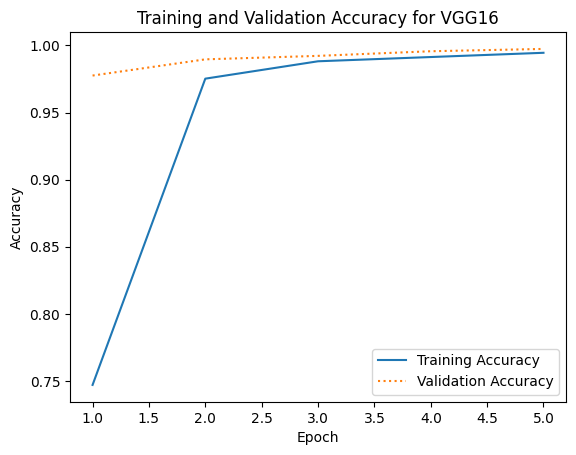

In [4]:
def train_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=32):
    hist = model.fit(x_train, y_train, 
              epochs= epochs, 
              batch_size= batch_size, 
              validation_data=(x_val, y_val))
    return hist


models = {
    'MobileNet': MobileNet(weights='imagenet', include_top=False),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False),
    'ResNet50': ResNet50(weights='imagenet', include_top=False),
    'VGG16': VGG16(weights='imagenet', include_top=False)
}

save_dir = '../Streamlit/saved_models/'

for model_name, base_model in models.items():
    print(f"\nTraining model: {model_name}")
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    hist = train_model(model, x_train_norm, y_train_encoded, x_test_norm, y_test_encoded, epochs=5, batch_size=32)
    
    model.save(os.path.join(save_dir, f'{model_name}_audio_classifier.h5'))
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    epochs_range = range(1, len(acc) + 1)

    plt.plot(epochs_range, acc, '-', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, ':', label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
    plt.close()


In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import models
import tensorflow as tf
# Define the mapping from Keras models to PyTorch models
model_mapping = {
    'MobileNet': models.mobilenet_v2,
    'InceptionV3': models.inception_v3,
    'ResNet50': models.resnet50,
    'VGG16': models.vgg16,
}

# Load and convert each Keras model to PyTorch
save_dir = '../Streamlit/saved_models/'
pth_save_dir = '../Streamlit/saved_models_pth/'

# Create directory if it doesn't exist
os.makedirs(pth_save_dir, exist_ok=True)

# Load and convert each model
for model_name in ['MobileNet', 'InceptionV3', 'ResNet50', 'VGG16']:
    # Load the Keras model
    keras_model_path = os.path.join(save_dir, f'{model_name}_audio_classifier.h5')
    keras_model = tf.keras.models.load_model(keras_model_path)

    # Create a corresponding PyTorch model
    if model_name == 'InceptionV3':
        pytorch_model = model_mapping[model_name](pretrained=False, aux_logits=False, transform_input=False)
        pytorch_model.fc = nn.Linear(pytorch_model.fc.in_features, 1)
    else:
        pytorch_model = model_mapping[model_name](pretrained=False)
        num_ftrs = pytorch_model.classifier[6].in_features
        pytorch_model.classifier[6] = nn.Linear(num_ftrs, 1)

    # Save the PyTorch model
    pth_model_path = os.path.join(pth_save_dir, f'{model_name}_audio_classifier.pth')
    torch.save(pytorch_model.state_dict(), pth_model_path)

print("Models saved as .pth files.")
